<a href="https://colab.research.google.com/github/dblacasmos/Profitability-Analysis-Pricing-Strategy/blob/main/Notebook_Reto2_Tienda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. IMPORTACIONES Y CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


*   **import numpy as np** -> Importa Numpy con alias np. Usado para operaciones numéricas.
*   **import pandas as pd** -> Importa Pandas como pd para trabajar con dataframes.
*   **import matplotlib.pyplot as plt** -> Módulo de gráficos básicos de Matplotlib.
*   **%matplotlib inline** -> Hace que los gráficos se vean dentro del notebook.
*   **import seaborn as sns** -> Importa Seaborn para gráficos estadísticos bonitos.
*   **sns.set_style('darkgrid')** -> Estilo visual de los gráficos: fondo gris con rejilla.





## **2. CARGA DEL DATASET (Store.csv)**

In [2]:
from pandas.core.reshape import encoding
df=pd.read_csv ('Store.csv',
               encoding = 'ISO-8859-1',
               parse_dates=['Order Date', 'Ship Date'])
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164



*  **pd.read_csv(...)**
   *  Lee el CSV desde esa ruta.
   *  **encoding='ISO-8859-1'** -> para soportar carácteres especiales.
   *  **parse_dates=['Order Date','Ship Date']** -> convierte esas columnas a tipo fecha.
*  **df** -> DataFrame principal con todos los datos.
*  **df.head()** -> Muestra las primeras filas para ver como es la tabla.

## **3. VISTA RÁPIDA DEL DATAFRAME**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n


*   Muestra:
    *   nº filas y columnas,
    *   tipo de cada columna,
    *   si hay nulos.



In [4]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


*   Estadísticas de columnas numéricas: media, desviación estándar, min, max, porcentajes, etc.

In [5]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


*   Estadísticas de columnas catégoricas (tipo object): count, nº de valores únicos, valor más frecuente, frecuencia.

## **4. LIMPIEZA BÁSICA**

### **DATA CLEANING**

In [6]:
df.duplicated().sum()

np.int64(0)

*   **df.duplicated().sum()** -> Cuenta cuántas filas duplicadas hay en el DataFrame.

In [7]:
df.drop_duplicates(inplace=True)

*   Elimina filas duplicadas.
*   **inplace=True** -> modifica df directamente.

In [8]:
df.isna().sum()
# No hay valores nulos

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


*   **df.isna().sum()** -> Cuenta nulos por columna.
*   El comentario nos indica que no hay valores nulos.

## **5. FEATURE ENGINEERING BÁSICO**

### **Fiture_engineering**

In [9]:
df['Cost']=df['Sales']-df['Profit']
df['profit_margin']=(df['Profit']/df['Sales'])*100

*   **df['Cost']** -> Crea una columna de coste:
    *   Coste≈Ventas - Beneficio.
*   **df['profit_margin']** -> Margen de beneficio en %:
    *   (Profit/Sales)*100.

In [10]:
df['is_gain']=np.where(df['Profit']>0,1,0)

*   **np.where(condición, valor_si_True, valor_si_False)**
*   Crea columna binaria:
    *   1 si **Profit > 0** (ganancia),
    *   0 si **Profit ≤ 0** (pérdida).

In [11]:
df['Days_to_ship']=(df['Ship Date']-df['Order Date']).dt.days.astype(int)

*   Resta fechas (Fecha pedido - Fecha envío) -> **Timedelta** (es un object de un intervalo de tiempo).
*   **.dt.days** -> Convierte el Timedelta a nº de días.
*   **.astype(int)** -> asegura tipo entero.
*   **df['Days_to_ship']** -> Crea días que tarda en enviarse.


In [12]:
df['sales_per_quantity']=df['Sales']/df['Quantity']

*   **df['sales_per_quantity']** -> Crea **"precio medio por unidad"**: ventas totales/cantidad.

In [13]:
df['month_order']=df['Order Date'].dt.month
df['year_order']=df['Order Date'].dt.year

*   Extrae mes y año de la fecha de pedido.

In [14]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Cost',
       'profit_margin', 'is_gain', 'Days_to_ship', 'sales_per_quantity',
       'month_order', 'year_order'],
      dtype='object')

*   Muestra todas las columnas del DataFrame.

In [15]:
len(df.columns)

28

*   Cuenta cuántas columnas hay.

## **6. PREPARACIÓN Y PRIMEROS EDA**

### **EDA & Visualization**

In [16]:
df_used=df[['Row ID','Ship Mode','Customer Name','Segment','City',
            'State','Country','Region','Category','Sub-Category',
            'Product Name','Sales','Quantity','Discount','Cost',
            'Profit','profit_margin','is_gain','Days_to_ship',
            'sales_per_quantity','month_order','year_order']]
df_used.set_index('Row ID',inplace=True)
df_used.head()

,Ship Mode,Customer Name,Segment,City,State,Country,Region,Category,Sub-Category,Product Name,...,Quantity,Discount,Cost,Profit,profit_margin,is_gain,Days_to_ship,sales_per_quantity,month_order,year_order
Row ID,,,,,,,,,,,,,,,,,,,,,
1,Second Class,Claire Gute,Consumer,Henderson,Kentucky,United States,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,...,2,0.00,220.0464,41.9136,16.00,1,3,130.9800,11,2016
2,Second Class,Claire Gute,Consumer,Henderson,Kentucky,United States,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",...,3,0.00,512.3580,219.5820,30.00,1,3,243.9800,11,2016
3,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,United States,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,...,2,0.00,7.7486,6.8714,47.00,1,4,7.3100,6,2016
4,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,United States,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,...,5,0.45,1340.6085,-383.0310,-40.00,0,7,191.5155,10,2015
5,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,United States,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,...,2,0.20,19.8516,2.5164,11.25,1,7,11.1840,10,2015


*   **df_used=df[[...]]** -> Crea un subconjunto con las columnas que vas a usar.
*   **set_index('Row ID')** -> Pone **Row ID** como índice (identificador único).
*   **df_used.head()** -> vista rápida.

In [17]:
# Suma de Ventas
sum_sales=df_used['Sales'].sum()

# Suma de Ganancias
sum_profit=df_used['Profit'].sum()

# Suma de Costes
sum_cost=df_used['Cost'].sum()

# Suma de Cantidades
sum_quantity=df_used['Quantity'].sum()

# Suma de Descuentos
sum_discount=df_used['Discount'].sum()

print('sum_sales:',sum_sales)
print('sum_profit:',sum_profit)
print('sum_cost:',sum_cost)
print('sum_quantity:',sum_quantity)
print('sum_discount:',sum_discount)


sum_sales: 2297200.8603000003
sum_profit: 286397.0217
sum_cost: 2010803.8386
sum_quantity: 37873
sum_discount: 1561.09


*   Calcula la suma total de:
    *   ventas, beneficios, costes, cantidades y descuentos.
*   Guarda cada suma en una variable.
*   Imprime todas las sumas totales.

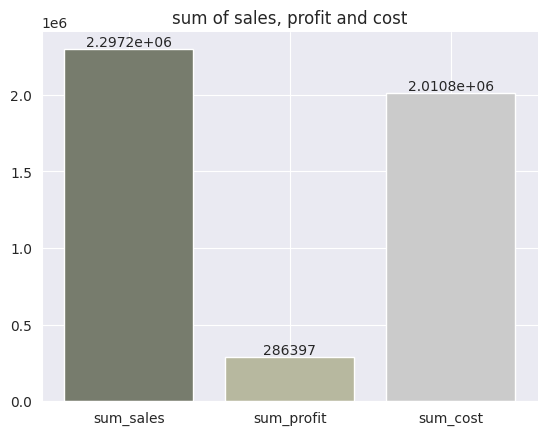

In [18]:
bars=plt.bar(['sum_sales','sum_profit','sum_cost'],
             [sum_sales,sum_profit,sum_cost],
             color=['#777C6D','#B7B89F','#CBCBCB'])
plt.title('sum of sales, profit and cost')
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.bar_label(bars)
plt.show()

*   **plt.bar(...)** -> Gráfico de barras con las tres sumas totales.
*   **plt.title(...)** -> Título del gráfico.
*   **plt.gca()** -> Obtiene los ejes actuales.
*   **ax.spines[...]** -> Oculta bordes superior y derecho para estética.
*   **plt.bar_label(bars)** -> Pone etiquetas con los valores encima de cada barra.
*   **plt.show()** -> Muestra el gráfico.

In [19]:
total_profit_margin=(sum_profit/sum_sales)*100
total_profit_margin

np.float64(12.467217240315604)

*   Calcula el margen de beneficio total en %.
*   **total_profit_margin** -> Muestra el valor.

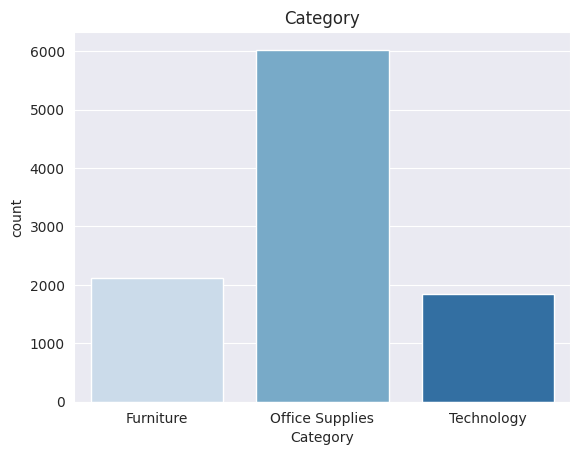

In [20]:
sns.countplot(data=df_used,x='Category',hue='Category', palette='Blues')
plt.title('Category')
plt.show()

*   **sns.countplot** -> Cuenta cuántos registros hay por categoría.
*   Eje X: **Category**.
*   **palette='Blues'** -> Colores azules.
*   Título del gráfico.
*   **show** -> Muestra que **Office Supplies** es la más frecuente.

In [21]:
sales_furnitur=df.loc[df['Category']=='Furniture','Sales'].sum()
sales_office=df.loc[df['Category']=='Office Supplies','Sales'].sum()
sales_technology=df.loc[df['Category']=='Technology','Sales'].sum()

print('sales_furnitur:',sales_furnitur)
print('sales_office:',sales_office)
print('sales_technology:',sales_technology)

profit_furnitur=df.loc[df['Category']=='Furniture','Profit'].sum()
profit_office=df.loc[df['Category']=='Office Supplies','Profit'].sum()
profit_technology=df.loc[df['Category']=='Technology','Profit'].sum()

print(50*'-')

print('profit_furnitur:',profit_furnitur)
print('profit_office:',profit_office)
print('profit_technology:',profit_technology)

sales_furnitur: 741999.7953
sales_office: 719047.032
sales_technology: 836154.033
--------------------------------------------------
profit_furnitur: 18451.272800000006
profit_office: 122490.8008
profit_technology: 145454.9481


*   **df['Category']=='...'** -> Crea un filtro booleano por categoría.
*   **df.loc[filtro, 'Sales']** -> Selecciona las filas donde **Category = '...'**
*   **.sum()** -> Suma esas **'Sales'** de la selección **'...'**
*   Imprime las ventas totales de los tres resultados.
*   Mismo estructura para **'Profit'**.

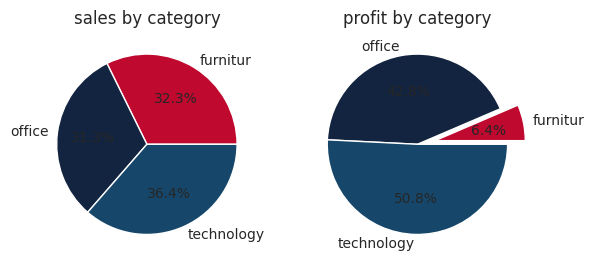

In [22]:
fig,ax=plt.subplots(1,2)
ax[0].pie([sales_furnitur,sales_office,sales_technology],
          labels=['furnitur','office','technology'],
          colors=['#BF092F','#132440','#16476A'],
          autopct='%1.1f%%')
ax[0].set_title('sales by category')

ax[1].pie([profit_furnitur,profit_office,profit_technology],
          labels=['furnitur','office','technology'],
          colors=['#BF092F','#132440','#16476A'],
          autopct='%1.1f%%',
          explode=[0.2,0,0])
ax[1].set_title('profit by category')

plt.show()

*   **fig.ax=plt.subplots(1,2)** -> Crea una figura con dos subgráficos en una fila.
*   Primer gráfico **(ax[0])**: pastel de ventas por categoría.
*   Segundo **(ax[1])**: pastel de beneficios por categoría.
*   **explode[0.2,0,0]** -> Resalta la primera porción (Furniture).
*   **plt.show()** -> Muestra ambos gráficos.

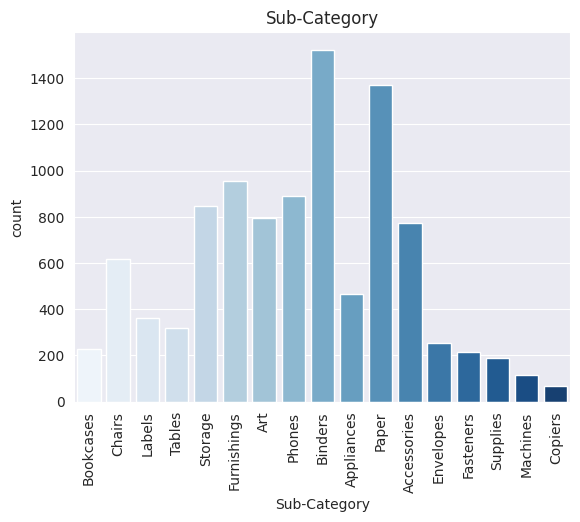

In [23]:
sns.countplot(data=df_used,x='Sub-Category',hue='Sub-Category', palette='Blues',legend=False)
plt.title('Sub-Category')
plt.xticks(rotation=90)
plt.show()

*   Countplot por subcategoría.
*   **plt.xticks(rotation=90)** -> Rota etiquetas 90º para que quepan.

In [24]:
order1=df_used.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
order2=df_used.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

*   **df_used.groupby('Sub-Category')** -> Agrupar las filas por subcategoría:
    *   **order1='Sales'.sum()** -> Por cada grupo de subcategoría suma ventas.
    *   **order2='Profit'.sum()** -> Por cada grupo de subcategoría suma ganancias.
    *   **.sort_values(ascending=False**) -> Ordena de mayor a menor.
*   se guardan en las variables para usarlo en gráficos posteriores.

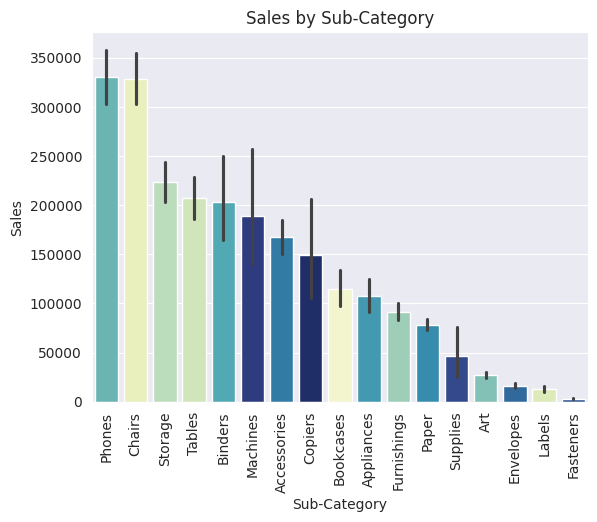

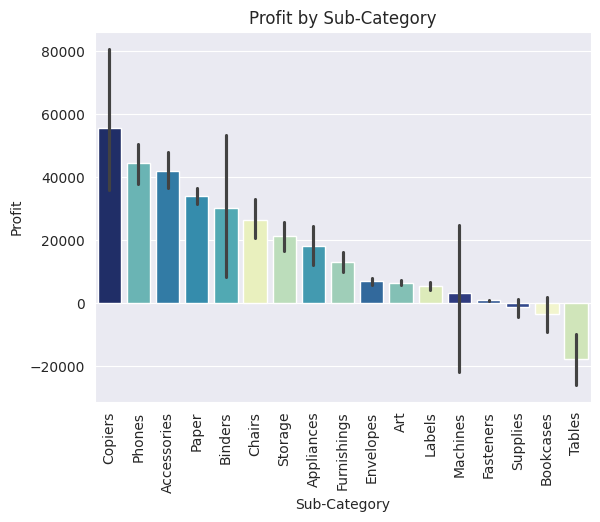

In [25]:
plt.figure(1)
sns.barplot(data=df_used,x='Sub-Category',y='Sales',hue='Sub-Category',
            palette='YlGnBu',legend=False,order=order1.index,estimator='sum')
plt.title('Sales by Sub-Category')
plt.xticks(rotation=90)

plt.figure(2)
sns.barplot(data=df_used,x='Sub-Category',y='Profit',hue='Sub-Category',
            palette='YlGnBu',legend=False,order=order2.index,estimator='sum')
plt.title('Profit by Sub-Category')
plt.xticks(rotation=90)
plt.show()

*   Creamos dos gráficos:
    *   Primero: barra de ventas por subcategoría.
    *   Segundo: barra de ganancias por subcategoría.
    *   **order=order1.index/order2.index** -> Ordena de mayor a menor.
    *   **estimator='sum'** -> Usa la suma como medida.

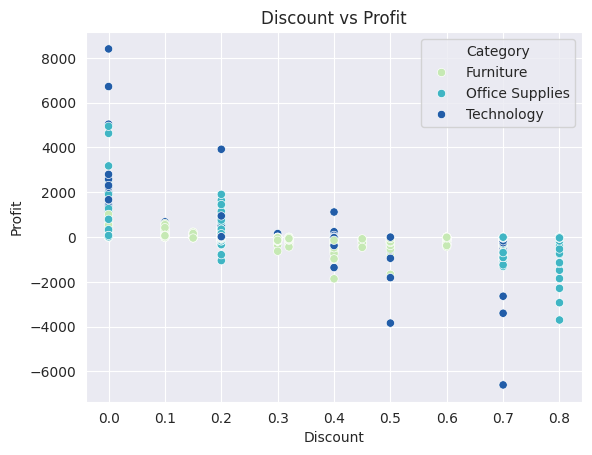

In [26]:
sns.scatterplot(data=df_used,x='Discount',y='Profit',hue='Category',palette='YlGnBu')
plt.title('Discount vs Profit')
plt.show()

*   Dispersión descuento vs beneficio.

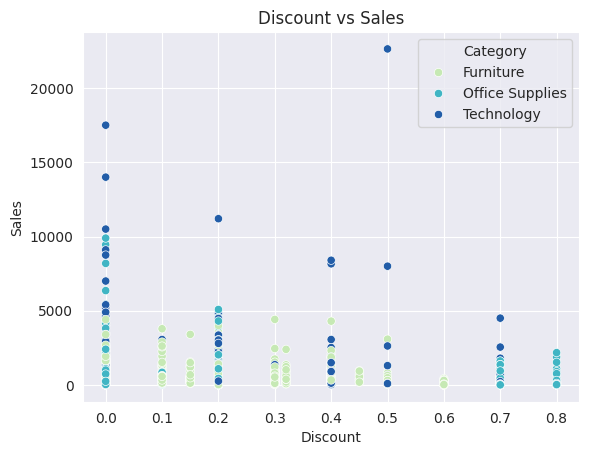

In [27]:
sns.scatterplot(data=df_used,x='Discount',y='Sales',hue='Category',palette='YlGnBu')
plt.title('Discount vs Sales')
plt.show()

*   Dispersión descuento vs ventas

## **7. EDA POR CIUDAD, ESTADO, REGIÓN Y TIEMPO**

In [28]:
sales_for_cities=df_used.pivot_table(index='City', values='Sales',aggfunc='sum').sort_values(by='Sales',ascending=False)
sales_for_cities=sales_for_cities.head(15)
sales_for_cities

,Sales
City,
New York City,256368.1610
Los Angeles,175851.3410
Seattle,119540.7420
San Francisco,112669.0920
Philadelphia,109077.0130
Houston,64504.7604
Chicago,48539.5410
San Diego,47521.0290
Jacksonville,44713.1830


*   **df_used.pivot_table** -> Crea una tabla dinámica.
    *   Filas: **index='City'** (ciudades).
    *   Valor: **values='Sales',aggfunc='sum'** (suma de ventas).
*   Ordena de mayor a menor por **'Sales'**.
*   Muestra el resultado.

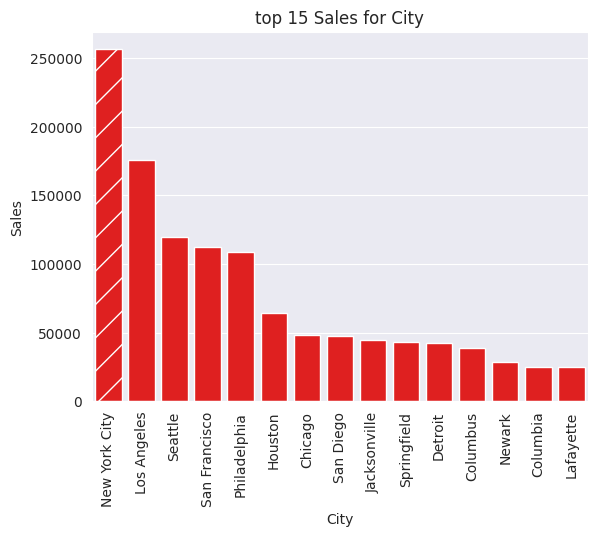

In [29]:
bars=sns.barplot(data=sales_for_cities,x=sales_for_cities.index,y='Sales',color='red')
bars.patches[0].set_hatch('/')
plt.title('top 15 Sales for City')
plt.xticks(rotation=90)
plt.show()

*   Gráfico de barras con las 15 ciudades con más ventas.
*   **bars.patches[0].set_hatch('/')** -> Pone la primera barra "rayada" para destacarla.

In [30]:
sales_for_state=df_used.pivot_table(index='State',values='Sales',aggfunc='sum').sort_values(by='Sales',ascending=False)
sales_for_state=sales_for_state.head(15)
sales_for_state

,Sales
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140
Florida,89473.7080
Illinois,80166.1010
Ohio,78258.1360
Michigan,76269.6140


*   Igual pero con estado (state).

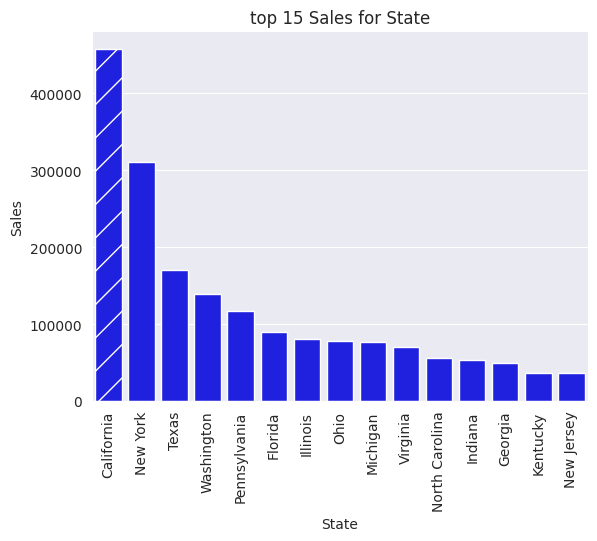

In [31]:
bars=sns.barplot(data=sales_for_state,x=sales_for_state.index,y='Sales',color='blue')
bars.patches[0].set_hatch('/')
plt.title('top 15 Sales for State')
plt.xticks(rotation=90)
plt.show()

*   Gráfico de barras de venta por estado(top 15).

In [32]:
sales_for_region=df_used.pivot_table(index='Region',values='Sales',aggfunc='sum').sort_values(by='Sales',ascending=False)
sales_for_region

,Sales
Region,
West,725457.8245
East,678781.2400
Central,501239.8908
South,391721.9050


*   Ventas totales por región.

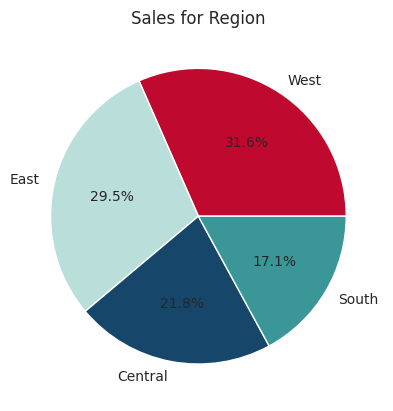

In [33]:
plt.pie(sales_for_region['Sales'],labels=sales_for_region.index,
        autopct='%1.1f%%',
        colors=['#BF092F','#BADFDB','#16476A','#3B9797'])
plt.title('Sales for Region')
plt.show()

*   Gráfico de pastel de ventas por región.

In [34]:
top_20_customer=df_used.pivot_table(index='Customer Name',values='Sales',aggfunc='sum').sort_values(by='Sales',ascending=False)
top_20_customer=top_20_customer.head(20)
top_20_customer

,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
Ken Lonsdale,14175.229
Sanjit Chand,14142.334
Hunter Lopez,12873.298
Sanjit Engle,12209.438


*   Clientes ordenados de mayor a menor por ventas, top 20.

In [35]:
sales_for_product=df_used.pivot_table(index='Product Name',values='Sales',aggfunc=['sum','count'])
sales_for_product=sales_for_product.sort_values(by=('sum','Sales'),ascending=False)
sales_for_product.head(20)

,sum,count
,Sales,Sales
Product Name,,
Canon imageCLASS 2200 Advanced Copier,61599.8240,5
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.3840,10
Cisco TelePresence System EX90 Videoconferencing Unit,22638.4800,1
HON 5400 Series Task Chairs for Big and Tall,21870.5760,8
GBC DocuBind TL300 Electric Binding System,19823.4790,11
GBC Ibimaster 500 Manual ProClick Binding System,19024.5000,9
Hewlett Packard LaserJet 3310 Copier,18839.6860,8
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.8950,3


*   Tabla dinámica por producto:
    *   suma de ventas(**sum**) y nº de apariciones(**count**).
Ordena por suma de ventas descendente y muestra los 20 primeros.

In [36]:
profit_for_product=df_used.pivot_table(index='Product Name',values='Profit',aggfunc=['sum','count'])
profit_for_product=profit_for_product.sort_values(by=('sum','Profit'),ascending=False)
profit_for_product.head(20)

,sum,count
,Profit,Profit
Product Name,,
Canon imageCLASS 2200 Advanced Copier,25199.9280,5
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390,10
Hewlett Packard LaserJet 3310 Copier,6983.8836,8
Canon PC1060 Personal Laser Copier,4570.9347,4
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766,3
Ativa V4110MDD Micro-Cut Shredder,3772.9461,2
"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714,2
Plantronics Savi W720 Multi-Device Wireless Headset System,3696.2820,7


*   Igual que el anterior pero con beneficios.

In [37]:
profit_for_product=df_used.pivot_table(index='Product Name',values='Profit',aggfunc=['sum','count'])
profit_for_product=profit_for_product.sort_values(by=('sum','Profit'),ascending=True)
profit_for_product.head(20)

,sum,count
,Profit,Profit
Product Name,,
Cubify CubeX 3D Printer Double Head Print,-8879.9704,3
Lexmark MX611dhe Monochrome Laser Printer,-4589.9730,4
Cubify CubeX 3D Printer Triple Head Print,-3839.9904,1
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-2876.1156,5
Bush Advantage Collection Racetrack Conference Table,-1934.3976,7
GBC DocuBind P400 Electric Binding System,-1878.1662,6
Cisco TelePresence System EX90 Videoconferencing Unit,-1811.0784,1
Martin Yale Chadless Opener Electric Letter Opener,-1299.1836,6


*   **ascending=True** -> Ordena de menor a mayor beneficio(productos que más pierden)

In [38]:
sales_for_year_cat=df_used.groupby(['year_order','Category'],as_index=False)['Sales'].sum()
sales_for_year_cat

,year_order,Category,Sales
0,2014,Furniture,157192.8531
1,2014,Office Supplies,151776.4120
2,2014,Technology,175278.2330
3,2015,Furniture,170518.2370
4,2015,Office Supplies,137233.4630
5,2015,Technology,162780.8090
6,2016,Furniture,198901.4360
7,2016,Office Supplies,183939.9820
8,2016,Technology,226364.1800
9,2017,Furniture,215387.2692


*   Agrupa por año y categoría la suma de ventas.

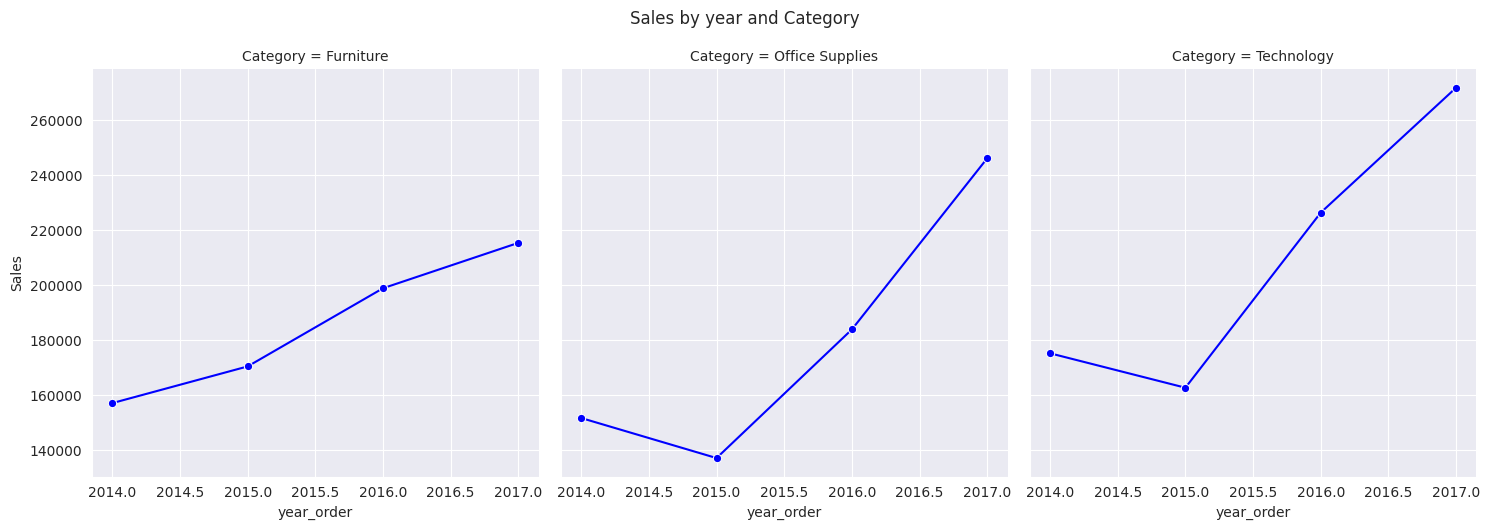

In [39]:
g=sns.relplot(data=sales_for_year_cat,x='year_order',y='Sales',
              kind='line',color='blue',col='Category', marker='o')
g.fig.suptitle('Sales by year and Category',y=1.05)
plt.show()

*   **sns.relplot(...)** -> Gráfico de relación de Seaborn, da una figura con uno o varios subgráficos.
*   **kind='line'** -> Le dice a Seaborn que quiere una gráfica de líneas.
*   **col='Category'** -> Divide el gráfico en columnas, una por categoría(facet grid), un gráfico por cada columna.
*   **marker='o'** -> Añade puntos en cada valor de la línea por estética.
*   **g.fig.suptitle('Sales by year and Category',year=1.05)**:
    *   **sns.relplot** devuelve un objeto **g**.
    *   **g.fig** es la figura completa.
    *   **suptitle**="super title"=título general para toda la figura.
    *   **y=1.05** ajusta la posición vertical para que el título no quede encima de los gráficos.

## **8. EDA POR MESES, SEGMENTOS, SHIPPING, ETC**

In [40]:
sales_by_month=df_used.groupby(['month_order','year_order'], as_index=False)['Sales'].sum()
sales_by_month

,month_order,year_order,Sales
0,1,2014,14236.8950
1,1,2015,18174.0756
2,1,2016,18542.4910
3,1,2017,43971.3740
4,2,2014,4519.8920
5,2,2015,11951.4110
6,2,2016,22978.8150
7,2,2017,20301.1334
8,3,2014,55691.0090
9,3,2015,38726.2520


*   Ventas agrupadas por mes y año.

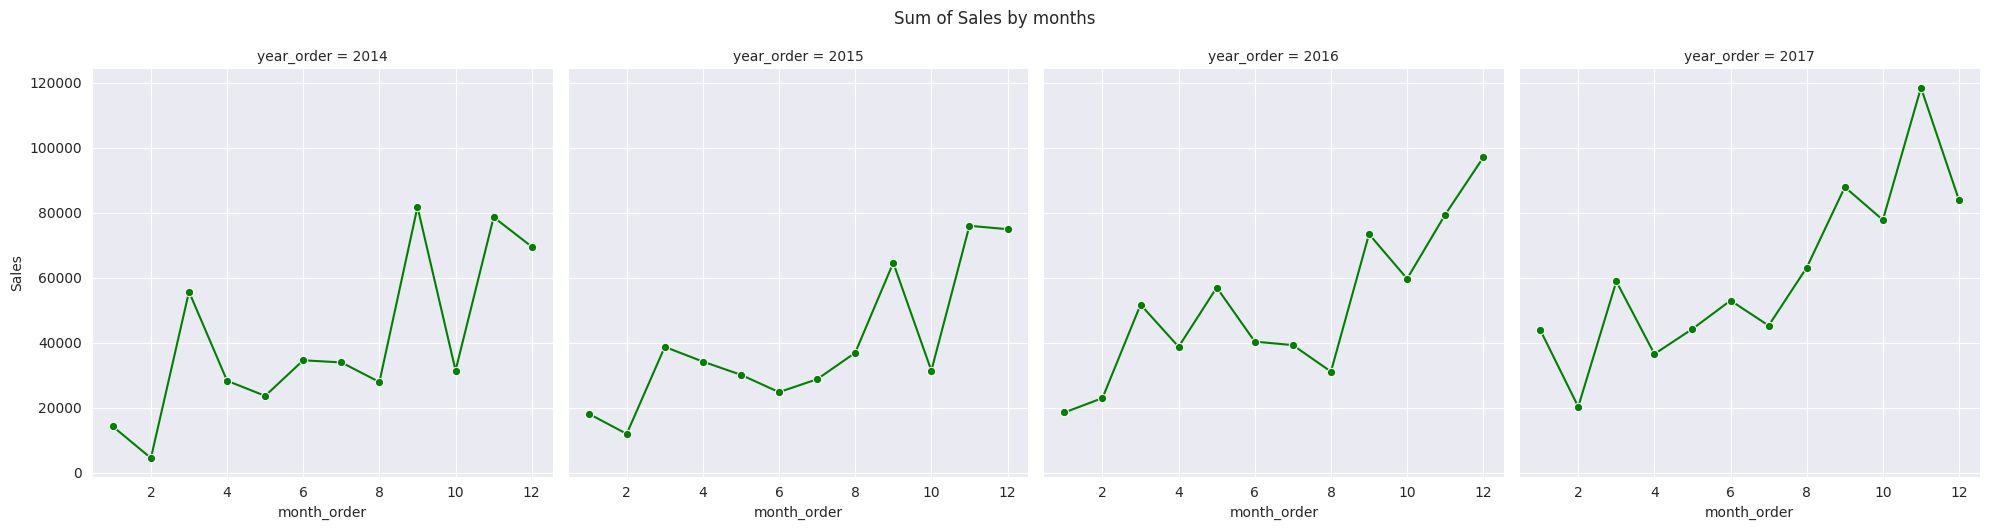

In [41]:
g=sns.relplot(data=sales_by_month,x='month_order',y='Sales',
              kind='line',color='green',col='year_order', marker='o')
g.fig.suptitle('Sum of Sales by months',y=1.05)
plt.show()

*   Gráfico lineal de cada año mostrando ventas por mes.

In [42]:
sales_year=df_used.pivot_table(index='year_order',values=['Sales','Profit'],aggfunc='sum')
sales_year.sort_values(by='Sales',ascending=False)

,Profit,Sales
year_order,,
2017,93439.2696,733215.2552
2016,81795.1743,609205.5980
2014,49543.9741,484247.4981
2015,61618.6037,470532.5090


*   Ventas y beneficios totales por año.
*   Ordena de mayor a menor venta.

In [43]:
sales_mon=df_used.pivot_table(index='month_order',values='Sales',columns='year_order',aggfunc='sum',margins=True)
sales_mon

year_order,2014,2015,2016,2017,All
month_order,,,,,
1,14236.8950,18174.0756,18542.4910,43971.3740,9.492484e+04
2,4519.8920,11951.4110,22978.8150,20301.1334,5.975125e+04
3,55691.0090,38726.2520,51715.8750,58872.3528,2.050055e+05
4,28295.3450,34195.2085,38750.0390,36521.5361,1.377621e+05
5,23648.2870,30131.6865,56987.7280,44261.1102,1.550288e+05
6,34595.1276,24797.2920,40344.5340,52981.7257,1.527187e+05
7,33946.3930,28765.3250,39261.9630,45264.4160,1.472381e+05
8,27909.4685,36898.3322,31115.3743,63120.8880,1.590441e+05
9,81777.3508,64595.9180,73410.0249,87866.6520,3.076499e+05


*   Tabla tipo "matriz":
    *   Cada fila es un mes.
    *   Sales es lo que quiero calcular.
    *   Cada columna será un año diferente.
    *   **margins=True** -> Añade una fila y una columna extra llamadas **All**:
        *   La **fila All** muestra la suma total por columna(ventas totales por año).
        *   La **columna All** muestra la suma total por fila(ventas totales en un mes sumando todos los años).

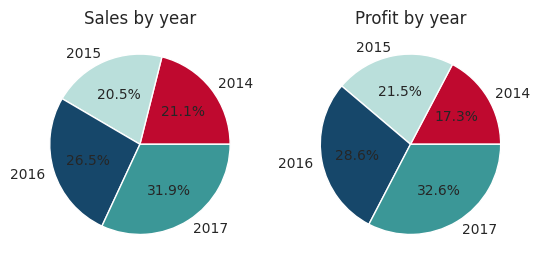

In [44]:
fig,ax=plt.subplots(1,2)
ax[0].pie(sales_year['Sales'],labels=sales_year.index,
          autopct='%1.1f%%',
          colors=['#BF092F','#BADFDB','#16476A','#3B9797'])
ax[0].set_title('Sales by year')

ax[1].pie(sales_year['Profit'],labels=sales_year.index,
          autopct='%1.1f%%',
          colors=['#BF092F','#BADFDB','#16476A','#3B9797'])
ax[1].set_title('Profit by year')

plt.show()

*   Dos gráficos de pastel con distribución por ventas y beneficios por año.

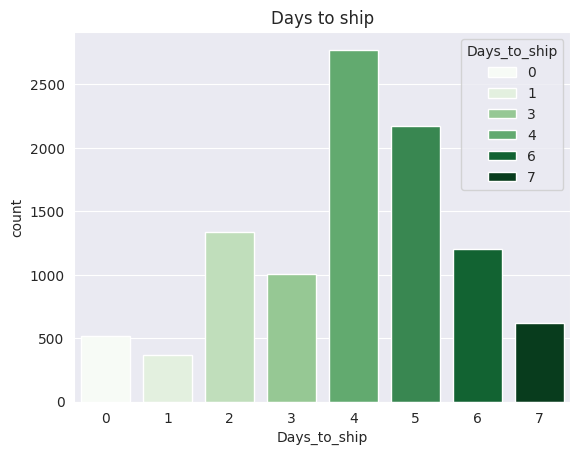

In [45]:
sns.countplot(data=df_used,x='Days_to_ship',hue='Days_to_ship', palette='Greens')
plt.title('Days to ship')
plt.show()

*   Muestra cuántos pedidos tardan X días en enviarse.

In [46]:
sales_state=df.groupby(['State','Category'])['Sales'].sum().sort_values(ascending=False).reset_index()
sales_state=sales_state.head(20)
sales_state

,State,Category,Sales
0,California,Technology,159271.0820
1,California,Furniture,156064.6015
2,California,Office Supplies,142351.9480
3,New York,Technology,127483.5000
4,New York,Furniture,93372.7290
5,New York,Office Supplies,90020.0420
6,Texas,Technology,65104.2240
7,Texas,Furniture,60593.2918
8,Washington,Technology,50536.7100
9,Washington,Furniture,48020.1520


*   Agrupa ventas por estado y categoría.
*   Ordena descendentemente y toma top 20 combinaciones.

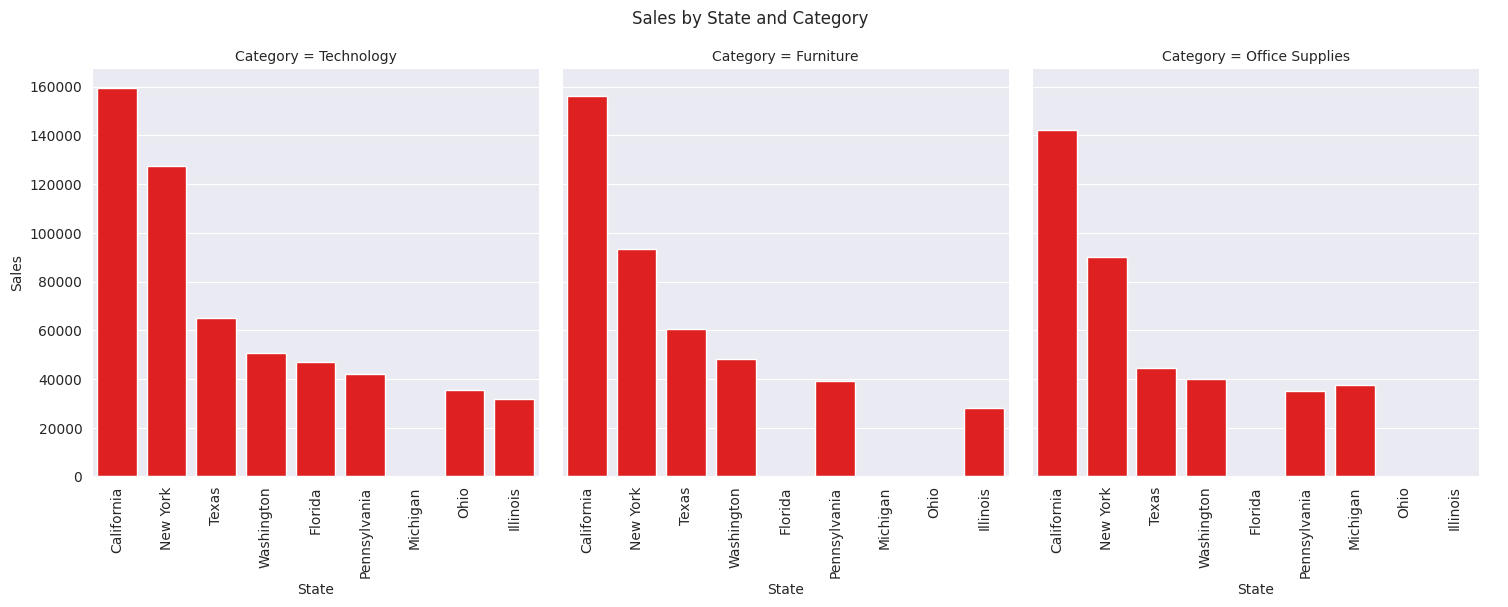

In [47]:
g=sns.catplot(data=sales_state,x='State',y='Sales',
              kind='bar', color='red',col='Category')
g.fig.suptitle('Sales by State and Category',y=1.05)
g.set_xticklabels(rotation=90)
plt.show()

*   **sns.catplot** -> Tipo de gráfico de Seaborn para visualizar **categorías**.
*   **kind='bar'** -> Indica que el gráfico será de barras.
*   **col='Category'** -> Haz un gráfico separado para cada categoría.

In [48]:
sales_state=df.groupby(['Region','Category'])['Sales'].sum().sort_values(ascending=False).reset_index()
sales_state=sales_state.head(20)
sales_state

,Region,Category,Sales
0,East,Technology,264973.9810
1,West,Furniture,252612.7435
2,West,Technology,251991.8320
3,West,Office Supplies,220853.2490
4,East,Furniture,208291.2040
5,East,Office Supplies,205516.0550
6,Central,Technology,170416.3120
7,Central,Office Supplies,167026.4150
8,Central,Furniture,163797.1638
9,South,Technology,148771.9080


*   Igual pero agrupando por región + categoría.

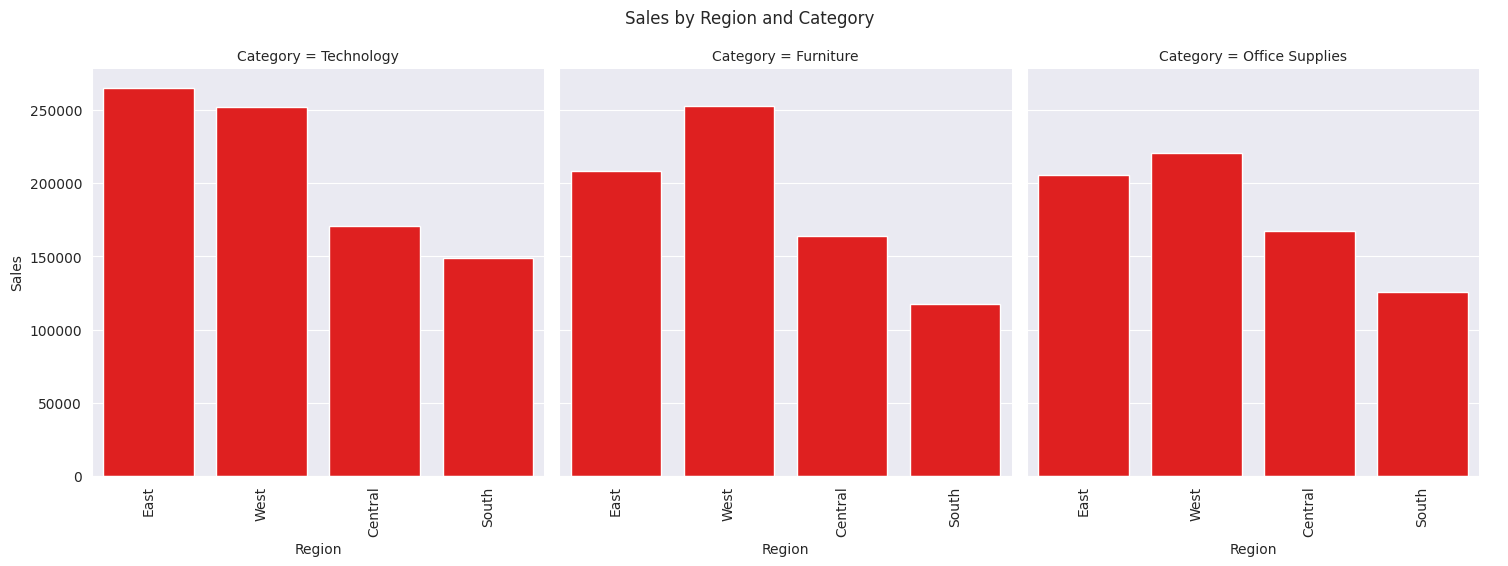

In [49]:
g=sns.catplot(data=sales_state,x='Region',y='Sales',
              kind='bar',color='red',col='Category')
g.fig.suptitle('Sales by Region and Category',y=1.05)
g.set_xticklabels(rotation=90)
plt.show()

*   Gráfico de barras por región y categoría.

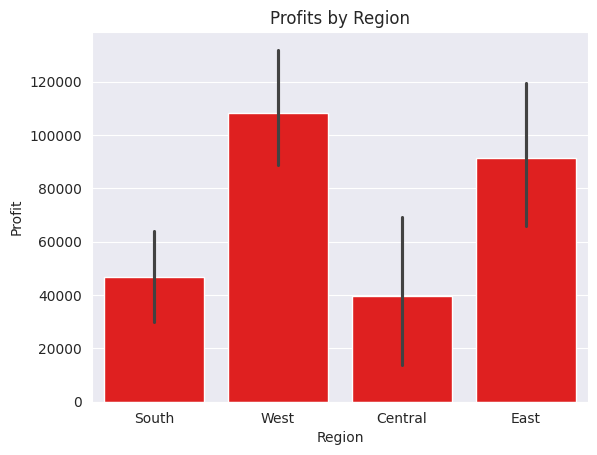

In [50]:
bars=sns.barplot(data=df_used,x='Region',y='Profit',color='red',estimator=np.sum)
plt.title('Profits by Region')
plt.show()

*   Suma de beneficio total por región.
*   **estimator=np.sum** -> Indica como calcular cada barra, por defecto es **estimator=np.mean**.

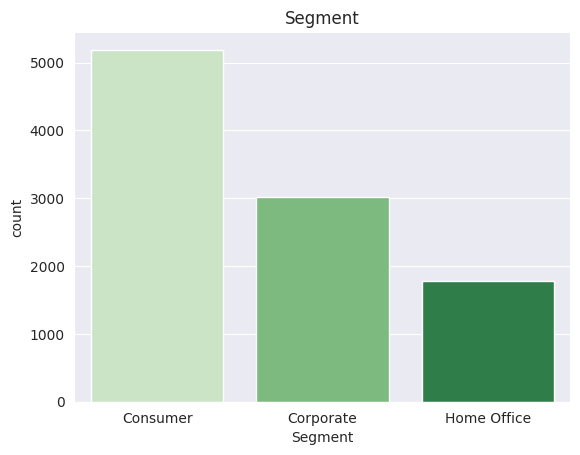

In [51]:
sns.countplot(data=df_used,x='Segment',hue='Segment',palette='Greens')
plt.title('Segment')
plt.show()

*   Cuenta cuántos registros hay en cada segmento(Consumer,Corporate,etc).

In [52]:
df_used.pivot_table(index='Segment',values='Sales',aggfunc='sum').sort_values(by='Sales',ascending=False)

,Sales
Segment,
Consumer,1.161401e+06
Corporate,7.061464e+05
Home Office,4.296531e+05


*   Ventas por segmento, ordenadas de mayor a menor.

In [53]:
df_used.pivot_table(index='Segment',values='Profit',aggfunc='sum').sort_values(by='Profit',ascending=False)

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


*   Beneficio por segmento.

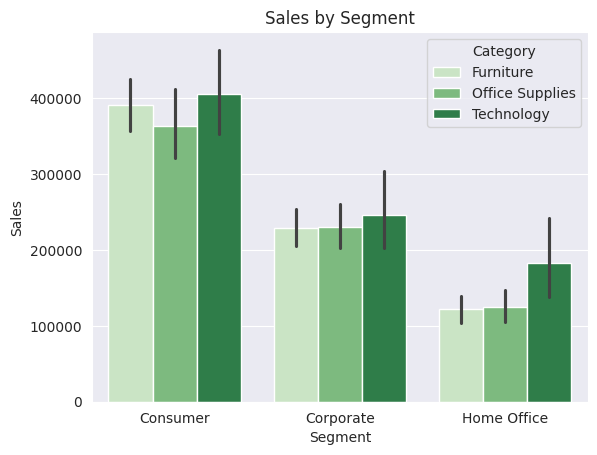

In [54]:
sns.barplot(data=df_used,x='Segment',y='Sales',
            hue='Category',palette='Greens',estimator=sum)
plt.title('Sales by Segment')
plt.show()

*   Gráfico de barras apiladas por segmento y categoría(sales).

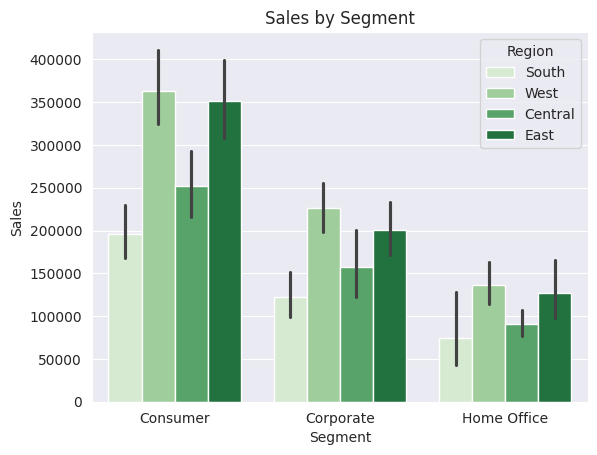

In [55]:
sns.barplot(data=df_used,x='Segment',y='Sales',
            hue='Region',palette='Greens',estimator=sum)
plt.title('Sales by Segment')
plt.show()

*   Similar pero separa por región.

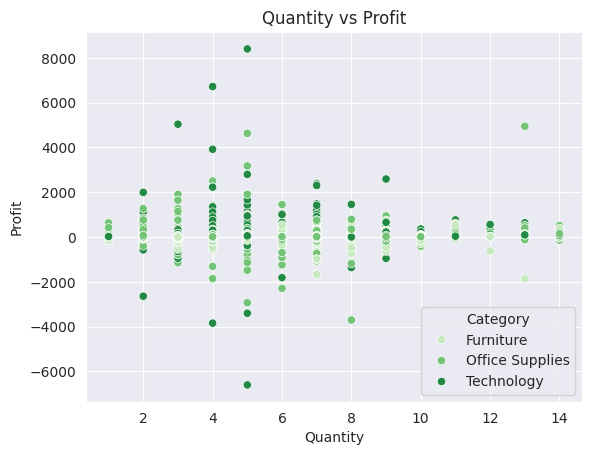

In [56]:
sns.scatterplot(data=df_used,x='Quantity',y='Profit',hue='Category',palette='Greens')
plt.title('Quantity vs Profit')
plt.show()

*   Dispersión cantidad vs beneficio, coloreado por categoría.
*   **sns.scatterplot** -> Gráfico de dispersión en Seaborn por puntos.

## **9. SHIP MODE, DISTRIBUCIONES Y CORRELACIÓN**

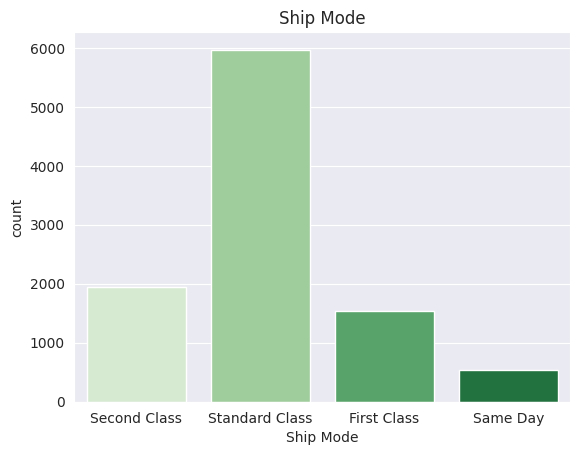

In [57]:
sns.countplot(data=df_used,x='Ship Mode',hue='Ship Mode',palette='Greens')
plt.title('Ship Mode')
plt.show()

*   Cuenta cuántos pedidos van por cada modo de envío(Standard,Second Class,etc).

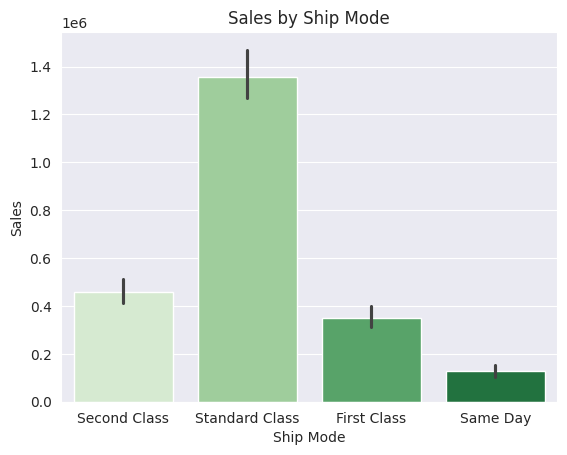

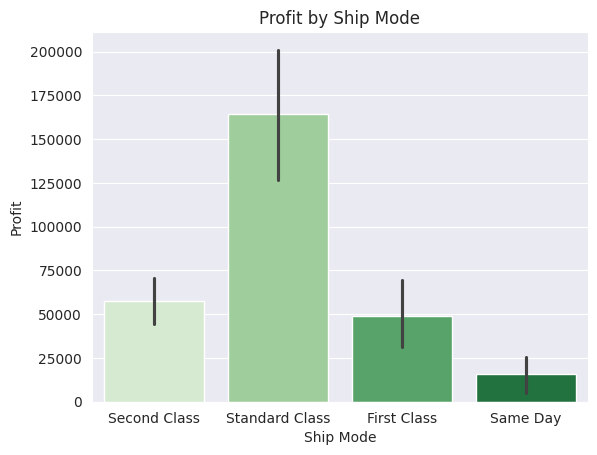

In [58]:
plt.figure(1)
sns.barplot(data=df_used,x='Ship Mode',y='Sales',hue='Ship Mode',
            palette='Greens',estimator=sum)
plt.title('Sales by Ship Mode')

plt.figure(2)
sns.barplot(data=df_used,x='Ship Mode',y='Profit',hue='Ship Mode',
            palette='Greens',estimator=sum)
plt.title('Profit by Ship Mode')
plt.show()

*   **plt.figure(1)** -> Gráfico 1: ventas por modo de envío.
*   **plt.figure(2)** -> Gráfico 2: beneficios por modo de envío.

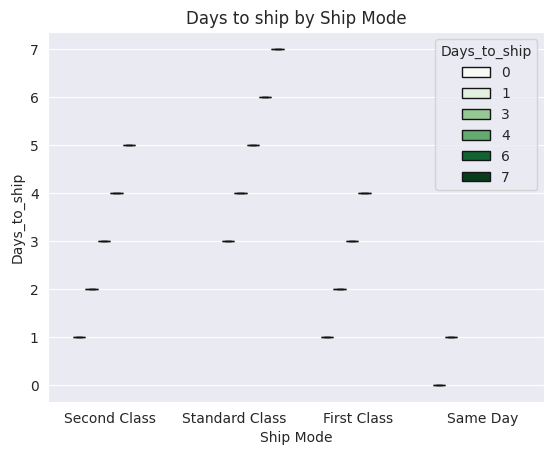

In [59]:
sns.boxplot(data=df_used,x='Ship Mode',y='Days_to_ship',hue='Days_to_ship',palette='Greens')
plt.title('Days to ship by Ship Mode')
plt.show()

*   **sns.boxplot** -> Gráfico de cajas de Seaborn.
*   Boxplot del nº de días para enviar según el modo de envío.

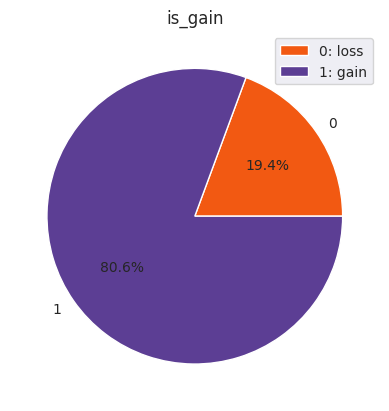

In [60]:
count_gain=df_used.groupby('is_gain').size().reset_index(name='count')
plt.pie(count_gain['count'],labels=count_gain['is_gain'],
        autopct='%1.1f%%',colors=['#F25912','#5C3E94'])
plt.title('is_gain')
plt.legend(['0: loss','1: gain'])
plt.show()

*   **df_used.groupby('is_gain')** -> Agrupa el dataframe por la columna is_gain.
*   **is_gain** tiene valores:
    *   1 -> el pedido generó beneficio.
    *   0 -> el pedido generó pérdida.
*   **groupby** crea dos grupos:
    *   Grupo 0: todas las filas donde **is_gain=0**.
    *   Grupo 1:todas las filas donde **is_gain=1**.
*   **size()** -> Cuenta cuántas filas hay en cada grupo.
*   **.reset_index(name='count')** -> Convierte ese dataframe ordenado con dos columnas y se guarda en la variable count_gain.
*   **count_gain['count']** -> Son los nº que va a usar para calcular el tamaño de la pòrción en el gráfico de pastel.
*   **labels=count_gain['is_gain']** -> Etiquetas en el pastel(**0 ó 1**).
*   **plt.legend(['0: loss','1: gain'])** -> Añade leyenda manual para que se explique mejor.

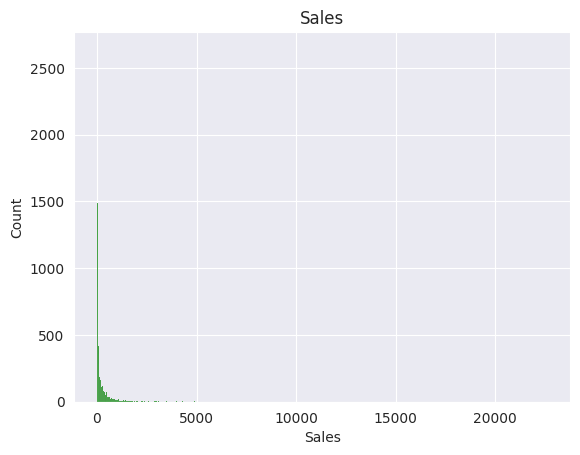

In [61]:
sns.histplot(data=df_used,x='Sales',color='green')
plt.title('Sales')
plt.show()

*   **sns.histplot** -> Histograma de Seaborn.
*   Crea un histograma de ventas.

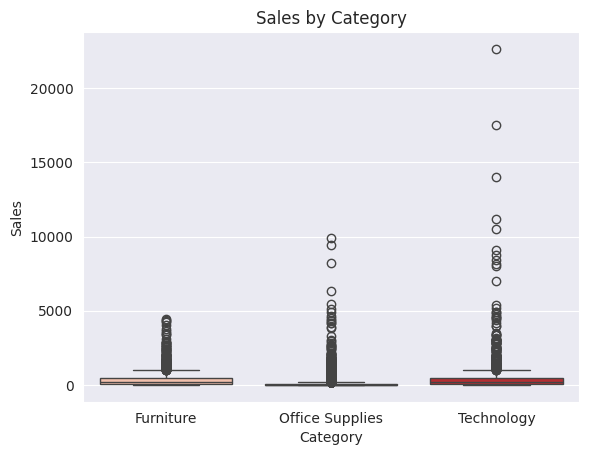

In [62]:
sns.boxplot(data=df_used,x='Category',y='Sales',hue='Category',palette='Reds')
plt.title('Sales by Category')
plt.show()

*   Boxplot de ventas por categoría.

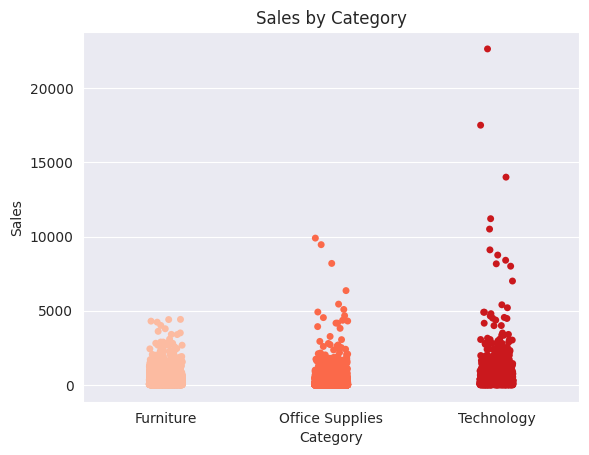

In [63]:
sns.stripplot(data=df_used,x='Category',y='Sales',hue='Category',palette='Reds')
plt.title('Sales by Category')
plt.show()

*   **sns.stripplot** -> Gráfico de puntos donde cada punto representa una fila del dataset.


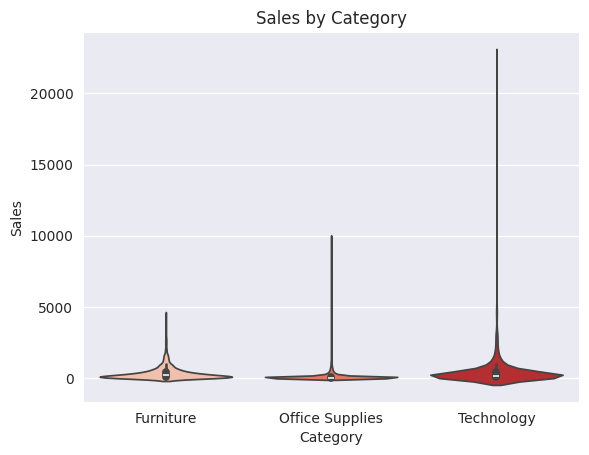

In [64]:
sns.violinplot(data=df_used,x='Category',y='Sales',hue='Category',palette='Reds')
plt.title('Sales by Category')
plt.show()

*   **sns.violinplot** -> Gráfico que muestra la forma de distribución(igual a un histograma), pero vertical y suavizado.

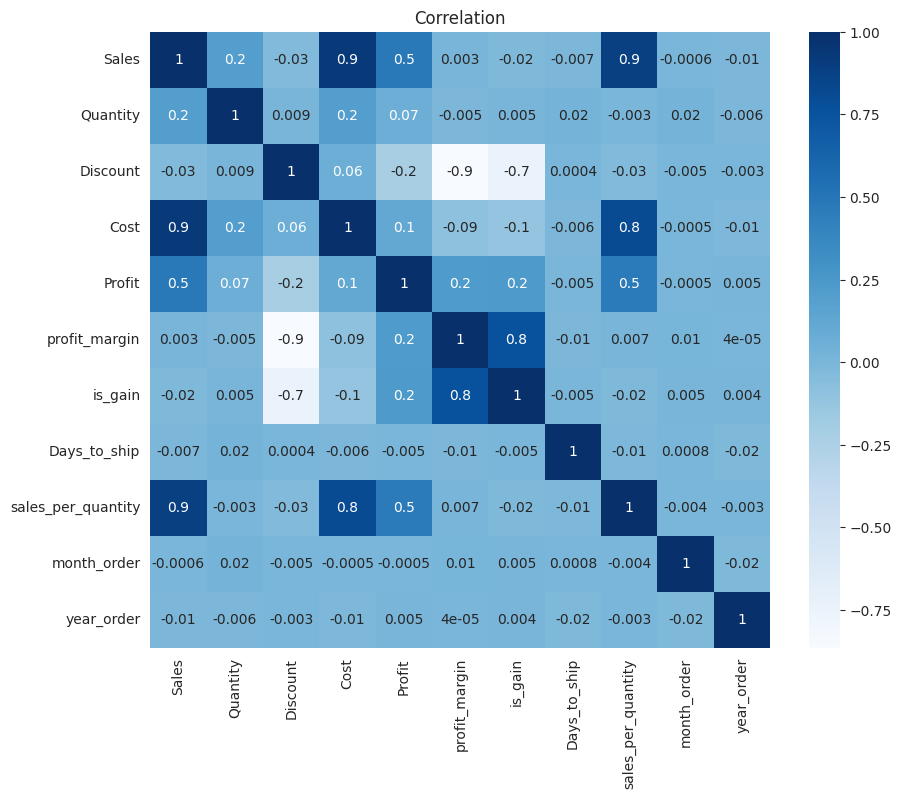

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(df_used.corr(numeric_only=True),annot=True,cmap='Blues',fmt='.1g')
plt.title('Correlation')
plt.show()

*   **plt.figure(figsize=(10,8))** -> Crea una figura nueva con tamaño en pulgadas 10(ancho) y 8(alto).
*   **sns.heatmap(...)** -> Dibuja un **mapa de calor** de una matriz. Los colores indican qué tan fuerte es la correlación:
    *   más azul oscuro = alta correlación.
    *   más claro = baja correlación.
*   **df_used.corr(numeric_only=True)**
    *   Calcula la **matriz de correlación** del dataframe,(tabla que muestra como se relaciona una variable con otra).
    *   Solamente usa columnas numéricas.
    *   Relaciones correlación:
        *   **1.0**  -> correlación perfecta positiva.
        *   **-1.0** -> correlación perfecta negativa.
        *   **0.0**  -> no relación.
*   **annot=True** -> **"annotation"** = poner los valores numéricos encima de cada celda,(con esto ves números aparte de colores).
*   **cmap='Blues'** -> Colormap en tonos en azul.
*   **fmt='.1g'** -> Formato de los nº de cada celda(un dígito significativo).


## **10. EDA AUTOMÁTICO (YDATA-PROFILING)**

In [66]:
#Instalar lib ydata-profiling
!pip install ydata-profiling

try:
  from ydata_profiling import ProfileReport

  profile=ProfileReport(
      df,
      title='EDA Automático - Store',
      explorative=True
      )
  profile.to_file('eda_automatico_store.html')
  print('Informe generado: eda_automatico_store.html')
except Exception as e:
  print('No se pudo generar el perfil automático. Error:')
  print(e)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.8 MB/s eta 0:00:00


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 28/28 [00:00<00:00, 44.90it/s]
/usr/local/lib/python3.12/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9 9 4 ... 0 0 3]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/usr/local/lib/python3.12/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6 6 6 ... 9 9 9]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Informe generado: eda_automatico_store.html


*   Instala librería **ydata-profiling**.
*   Intenta importar **ProfileReport**.
*   **ProfileReport(...)** genera un informe EDA completo:
    *   Distribuciones,nulos,correlaciones,etc.
*   **to_file(...)** -> guarda el informe en HTML
*   Si falla captura la excepción y la imprime.

## **11. INGENIERÍA DE CARACTERÍSTICAS Y PREPARACIÓN PARA ML (SCIKIT-LEARN)**

### **11.1. Selección de atributos(scikit-learn)**

In [67]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Aseguramos que trabajamos con columnas numéricas y la existencia de Profit
if 'Profit' in df.columns:
  X_num = df.select_dtypes(include=['number']).drop(columns=['Profit'])
  y = df['Profit']

  # Rellenamos de manera sencilla los nulos
  X_num = X_num.fillna(X_num.median())

  # 1.- SelectKBest (relación lineal)
  selector = SelectKBest(score_func=f_regression, k=min(5, X_num.shape[1]))
  selector.fit(X_num, y)
  selected_cols_kbest = X_num.columns[selector.get_support()].tolist()
  print('Top mejores columnas numéricas según SelectKBest:', selected_cols_kbest)

  # 2.- Importancia de características con RandomForest (no lineal)
  rf = RandomForestRegressor(n_estimators=100, random_state=42)
  rf.fit(X_num, y)
  importances = pd.Series(rf.feature_importances_, index=X_num.columns).sort_values(ascending=False)
  print('\nTop Importancia de variables númericas (RandomForest):')
  print(importances.head(10))
else:
  print('No se encontró la columna Profit en el dataframe')

Top mejores columnas numéricas según SelectKBest: ['Sales', 'Discount', 'profit_margin', 'is_gain', 'sales_per_quantity']

Top Importancia de variables númericas (RandomForest):
Sales                 0.471834
Cost                  0.225899
profit_margin         0.214574
sales_per_quantity    0.032256
Discount              0.014338
is_gain               0.011264
Days_to_ship          0.006852
month_order           0.006474
Postal Code           0.006209
Row ID                0.006125
dtype: float64


*   Importa de **scikit-learn**(**sklearn**)
    *   **SelectKBest**, **f_regression** -> selección de variables basada en relación lineal con la **y**.
    *   **RandomForestRegressor** -> modelo de bosque aleatorio para estimar la importancia de variables.
    *   **train_test_split** -> dividir en train/test.
    *   **StandardScaler** -> escalado estándar.
*   Comprueba que **Profit** existe.
*   **X_num = df.select_dtypes(includeÇ=['number']).drop(columns=['Profit'])** -> Toma solo columnas numéricas y quita Profit(objetivo).
*   **y = df['Profit']** -> variable objetivo.
*   **X_num = X_num.fillna(X_num.median())** -> rellena nulos con la mediana.
*   **SelectKBest(...)**:
    *   **score_func=f_regression** -> usa F-test de regresión.
    *   **k=min(5,X_num.shape[1])** -> selecciona hasta 5 mejores columnas.
*   **selector.fit(X_num, y)** -> ajusta la selección al dato.
*   **selector.get_support()** -> máscara booleana de columnas seleccionadas.
*   **RandomForestRegressor(...)** -> modelo no lineal para ver importancias.
*   **rf.fit(X_num, y)** -> entrena el modelo.
*   **rf.feature_importances_** -> peso de cada variable.
*   **pd.Series(...)sort_values(...)** -> ordena importancias.
*   Imprime top columnas.

### **11.2. Transformaciones (log y escalado)**

In [68]:
# Transformación logarítmica de Sales
if 'Sales' in df.columns:
  df['Sales_log'] = np.log1p(df['Sales'])
  print(df[['Sales','Sales_log']].head())

# Escalado estándar de Profit
if 'Profit' in df.columns:
  scaler = StandardScaler()
  df['Profit_scaled'] = scaler.fit_transform(df[['Profit']])
  print(df[['Profit','Profit_scaled']].head())

      Sales  Sales_log
0  261.9600   5.572002
1  731.9400   6.597064
2   14.6200   2.748552
3  957.5775   6.865450
4   22.3680   3.151368
     Profit  Profit_scaled
0   41.9136       0.056593
1  219.5820       0.815054
2    6.8714      -0.093002
3 -383.0310      -1.757484
4    2.5164      -0.111593


*   **np.log1p(x)** -> aplica log(1 + x) para estabilizar distribuciones muy sesgadas.
*   Crea **Sales log**.
*   **StandarScaler()** -> consiste en que Profit tenga media 0 y varianza 1.
*   **fit_transform** -> aprende media/desviación y transforma los datos.
*   Imprimen tanto la transformación como el escalado estándar.

### **11.3. Nuevos atributos**

In [69]:
# Atributo 1: margen de beneficio si no existiera
if 'Sales' in df.columns and 'Profit' in df.columns:
  if 'Profit_Margin' not in df.columns and 'profit_margin' not in df.columns:
    df['Profit_Margin'] = df['Profit'] / df['Sales']
    print(df[['Sales','Profit','Profit_Margin']].head())
  else:
    print('Ya existe una columna de margen de beneficio (Profit_Margin / profit_margin')

# Atributo 2: nivel de descuento (bajo/medio/alto)
if 'Discount' in df.columns:
  df['Discount_Level'] = pd.cut(
      df['Discount'],
      bins=[-0.001,0.1,0.3,1],
      labels=['Bajo','Medio','Alto']
  )
  print(df[['Discount','Discount_Level']].head())

# Atributo 3: variables temporales.
if 'Order Date' in df.columns:
  if not np.issubdtype(df['Order Date'].dtype, np.datetime64):
      df['Order Date'] = pd.to_datetime(df['Order Date'])
  df['Order Year'] = df['Order Date'].dt.year
  df['Order Month'] = df['Order Date'].dt.month
  df['Order DayOfWeek'] = df['Order Date'].dt.dayofweek
  print(df[['Order Date','Order Year','Order Month','Order DayOfWeek']].head())

Ya existe una columna de margen de beneficio (Profit_Margin / profit_margin
   Discount Discount_Level
0      0.00           Bajo
1      0.00           Bajo
2      0.00           Bajo
3      0.45           Alto
4      0.20          Medio
  Order Date  Order Year  Order Month  Order DayOfWeek
0 2016-11-08        2016           11                1
1 2016-11-08        2016           11                1
2 2016-06-12        2016            6                6
3 2015-10-11        2015           10                6
4 2015-10-11        2015           10                6


**Atributo 1:**
*   Comprobación de que el DataFrame contenga **Sales** y **Profit**.
*   Evita duplicados si ya existiera **Profit_Margin** o **profit_margin**.
*   Margen de beneficio = beneficio / ventas.
*   Imprime las 5 primeras líneas.

**Atributo 2:**
*   Comprobación de que exista Discount.
*   **pd.cut(df['Discount'],bins[-0.001,0.1,0.3,1],labels=['Bajo','Medio','Alto'])** -> Se categoriza el descuento en 3 niveles.
    *   **pd.cut** divide un valor numérico en rangos(bins).
        *   **-0.001 - 0.1** -> 'Bajo'.
        *   **0.1 - 0.3** -> 'Medio'.
        *   **0.3 - 1** -> 'Alto'.
Esto convierte el descuento en una variable categorical, ideal para modelos ML.
*   Muestra las 5 primeras filas.

**Atributo 3:**
*   Comprueba que existe **Order Date**
*   **if not np.issubdtype(df['Order Date'].dtype, np.datetime64)**:
    *   Si la columna **Order Date** no está en formato fecha entonces la convierte con **pd.to_datatime**.
    *   Si Order Date fuera texto no se podría extraer año, mes, etc.
*   Crea columnas para:
    *   Año (**Order Year**) -> **df['Order Date'].dt.year**
    *   Mes (**Order Month**)-> **df['Order Date'].dt.month**
    *   Día de la semana (**Order DayOfWeek**)-> **df['Order Date'].df.dayofweek**
*   Imprime 5 filas para verificar.

### **11.4. Dataset listo para ML con one-hot + train_test_split**

In [70]:
# Copia para no perder el dataframe original.
data=df.copy()

# Detectar columnas categóricas.
cat_cols = []
for c in ['Category','Sub-Category','Segment','Region']:
  if c in data.columns:
    cat_cols.append(c)

# One-hot enconding.
if cat_cols:
  data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

# Eliminar columnas no numéricas residuales.
data=data.select_dtypes(include=['number'])

# Separar Profit como variable a predecir.
if 'Profit' in data.columns:
  y=data['Profit']
  X=data.drop(columns=['Profit'])

  # Rellenamos nulos por mediana.
  X=X.fillna(X.median())

  # Train/test split
  X_train,X_test,y_train,y_test=train_test_split(
      X,y,
      test_size=0.2,
      random_state=42
  )

  print('Shape X_train:', X_train.shape)
  print('Shape X_test:', X_test.shape)
else:
  print('No se encontro la columna Profit en los datos numéricos codificados')

Shape X_train: (7995, 17)
Shape X_test: (1999, 17)


*   data = df.copy() -> copia el dataframe y así trabajamos sobre una copia para no romper la original.
*   Preparamos **cat_cols** como una lista de columnas categóricas a codificar.
*   **if c in data.columns:** -> añade a la lista las que realmente existen.
*   **pd.get_dummies(...,drop_first=True)**:
    *   **One-hot encoding** -> convierte las categorías en columnas 0/1.
    *   **drop_first=True** -> evita multicolinealidad eliminando una categoría por variable.
*   **data.select_dtypes(include=['number'])** -> Se queda con columnas numéricas(dummies, numéricas originales).
*   Comprueba que **Profit** sigue existiendo:
    *   **y=data['Profit']** -> objetivo.
    *   **X=data.drop(columns=['Profit'])** -> variables explicativas.
*   **X.fillna(X.median())** -> rellena nulos numéricos con la mediana y evitamos que el modelo reviente.
*   Usamos **scikit-learn**:
    *   **train_test_split(X,y,test_size=0.2,random_state=42)** -> divide datos en:
        *   80% entrenamiento (**X_train,y_train**).
        *   20% test (**X_test,y_test**).
        *   **random_state=42** -> reproducible, asegura que la división sea siempre igual.
*   Imprime los tamaños  de train y test.
*   Si no se encontrara Profit, muestra un mensaje de error.